In [1]:
import numpy as np
import keras
import pickle
import sklearn
from sklearn.utils import shuffle
import pandas as pd
from random import shuffle


Using TensorFlow backend.


In [177]:
with open('x_train_saved.pickle', 'rb') as f:
    x_train = np.array(pickle.load(f))
    
    
with open('y_train_saved.pickle', 'rb') as f:
    y_train = np.array((pickle.load(f)))

In [178]:
x_train = x_train[0,:,:]
y_train = y_train[0,:,:]
print(" x_train shape: ", x_train.shape, "\n", "y_train shape: ", y_train.shape)

 x_train shape:  (5455, 208) 
 y_train shape:  (5455, 3)


In [179]:
x_train = np.vstack(x_train)
x_train = x_train.reshape(x_train.shape[0], 13, 16,1)
y_train = np.vstack(y_train)
#x_train, y_train = shuffle(x_train, y_train, random_state=1)
input_shape = (13, 16, 1)

In [180]:
x_train.shape

(5455, 13, 16, 1)

In [181]:
hopp = 0
hoyre = 0
HH = 0

antall_hoyre = []

for i in range(len(y_train)):
    if y_train[i][0] == 1:
        hopp = hopp + 1
    elif y_train[i][1] == 1:
        hoyre = hoyre + 1
        antall_hoyre.append(i)
    elif y_train[i][2] == 1:
        HH = HH + 1
print("antall hopp:", hopp, "antall høyre:", hoyre, "antall HH", HH)    
    

shuffle(antall_hoyre)        
#print(antall_hoyre)
delete_frames = antall_hoyre[:HH]

    

antall hopp: 1 antall høyre: 2477 antall HH 2977


In [182]:
import matplotlib.pyplot as plt
print(hopp, hoyre, HH)

1 2477 2977


In [187]:
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
model = Sequential([
    #Dense(10, activation='relu', input_shape=(x_train.shape[1],)),
    Conv2D(20, kernel_size=(4, 4), strides=(1, 1), activation='linear', input_shape=(input_shape)),
    Conv2D(4, kernel_size=(3, 3), strides=(1, 1), activation='linear', input_shape=(input_shape)),

    Dense(10, activation='relu'),

    Flatten(),
    Dense(3, activation='softmax')
])


model.compile(Adam(lr = 0.0015),loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 10, 13, 20)        340       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 11, 4)          724       
_________________________________________________________________
dense_60 (Dense)             (None, 8, 11, 10)         50        
_________________________________________________________________
flatten_23 (Flatten)         (None, 880)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 3)                 2643      
Total params: 3,757
Trainable params: 3,757
Non-trainable params: 0
_________________________________________________________________


Train on 4364 samples, validate on 1091 samples
Epoch 1/20
 - 3s - loss: 0.8044 - acc: 0.5736 - val_loss: 0.6595 - val_acc: 0.5701
Epoch 2/20
 - 1s - loss: 0.6429 - acc: 0.6787 - val_loss: 0.6131 - val_acc: 0.7259
Epoch 3/20
 - 1s - loss: 0.5806 - acc: 0.7275 - val_loss: 0.5539 - val_acc: 0.7534
Epoch 4/20
 - 1s - loss: 0.5226 - acc: 0.7530 - val_loss: 0.5257 - val_acc: 0.7434
Epoch 5/20
 - 1s - loss: 0.4905 - acc: 0.7695 - val_loss: 0.4991 - val_acc: 0.7718
Epoch 6/20
 - 1s - loss: 0.4694 - acc: 0.7942 - val_loss: 0.4962 - val_acc: 0.7663
Epoch 7/20
 - 1s - loss: 0.4564 - acc: 0.8002 - val_loss: 0.4810 - val_acc: 0.7855
Epoch 8/20
 - 1s - loss: 0.4407 - acc: 0.8096 - val_loss: 0.4705 - val_acc: 0.7938
Epoch 9/20
 - 1s - loss: 0.4308 - acc: 0.8183 - val_loss: 0.4677 - val_acc: 0.7901
Epoch 10/20
 - 1s - loss: 0.4178 - acc: 0.8169 - val_loss: 0.4748 - val_acc: 0.7809
Epoch 11/20
 - 1s - loss: 0.4050 - acc: 0.8213 - val_loss: 0.4536 - val_acc: 0.7965
Epoch 12/20
 - 1s - loss: 0.3952 - ac

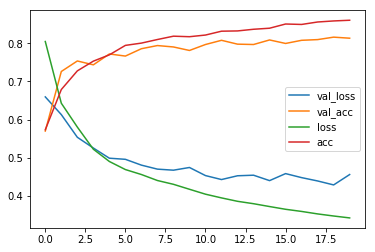

final validation acc:  0.81301558580451 
final validation loss:  0.45636484985718695 
final acc:  0.859990837484407 
final loss:  0.3428877606018217


In [189]:
history = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 200, epochs = 20, verbose = 2)
all_data = list(history.history.values())

val_loss, val_acc, loss, acc = all_data[0], all_data[1], all_data[2], all_data[3]

plt.plot(val_loss, label = "val_loss")
plt.plot(val_acc, label = "val_acc")
plt.plot(loss, label = "loss")
plt.plot(acc, label = "acc")
plt.legend(loc='best')

final_element = len(val_acc) - 1
plt.show()
print("final validation acc: ", val_acc[final_element],'\n' "final validation loss: ", val_loss[final_element],'\n' "final acc: ", acc[final_element],'\n' "final loss: ", loss[final_element])

In [186]:
from keras.models import load_model
model.save('mariplayer.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one


array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]